Q1. Train a perceptron
Perceptron is a fundamental building block for neural networks. Let us try to train
a single perceptron. Consider the data given in the following table. As one can see,
it has two attributes x1,x2, and a class label (either 0 or 1)
1. Implement the perceptron training rule and get the appropriate parameters for a
single perceptron (Using only basic libraries like NumPy)
2. Plot the data points and the obtained decision boundary
3. Also draw the schematic diagram of the trained perceptron with learned weights.
You can draw this on paper and upload it in the Python notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# test predictions
array = np.array(
    [
        [-3.98, -0.12 , 1],
        [-3.464,-2.11 , 1],
        [-3.461, 1.89 , 1],
        [-2.22 ,-3.474, 1],
        [-2.02 , 0.03 , 0],
        [-2.01 ,3.459 , 1],
        [-1.42 ,-1.409, 0],
        [-1.416,1.419 , 0],
        [-1.09 ,0.08  , 0],
        [-0.19 ,-4.13 , 1],
        [0.01  ,1.02  , 0],
        [0.03  ,-2.12 , 0],
        [0.04  ,2.06  , 0],
        [0.06  ,3.97  , 1],
        [0.07  ,0.1   , 0],
        [0.12  ,-1.12 , 0],
        [1.11  ,0.09  , 0],
        [1.411 ,1.419 , 0],
        [1.414 ,-1.415, 0],
        [1.86  ,3.47  , 1],
        [1.96  ,-0.12 , 0],
        [2.11  ,-3.472, 1]
    ])
data = np.hsplit(array, [2])
X = data[0]
y = data[1]

In [3]:
# confirm shapes of generated data
print("The shape of our input matrix, X, is: {0}.".format(X.shape))
print("The shape of our output vector, y, is: {0}.".format(y.shape))

The shape of our input matrix, X, is: (22, 2).
The shape of our output vector, y, is: (22, 1).


<AxesSubplot:xlabel='X1', ylabel='X2'>

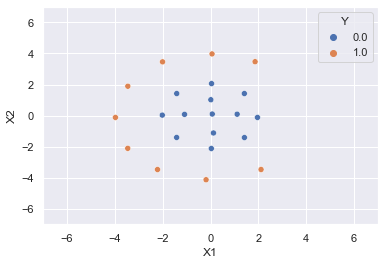

In [4]:
import pandas as pd
X_df = pd.DataFrame(X, columns=['X1','X2'])
y_df = pd.DataFrame(y, columns=["Y"])
frames = [X_df, y_df]
data = pd.concat(frames, axis=1)
# create scatter plot for samples from each class
plt.xlim([-7, 7])
plt.ylim([-7, 7])
sns.scatterplot(x="X1", y="X2", hue='Y', data=data)

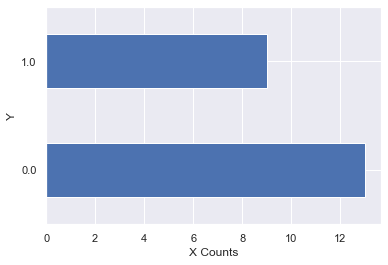

In [5]:
#plotting a graph to see class imbalance
data['Y'].value_counts().plot(kind = "barh")
plt.xlabel("X Counts")
plt.ylabel("Y")
plt.show()

In [6]:
import numpy as np

class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [7]:
y = y.astype(np.int_)

In [8]:
y = np.squeeze(y)

In [9]:
y

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

Weights: [ 0.4     0.468  -0.5706]


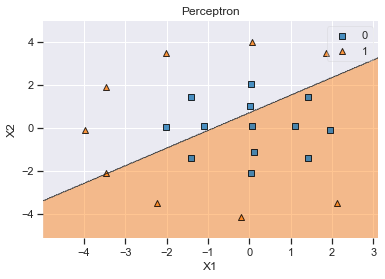

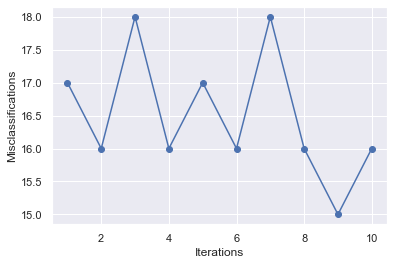

Total number of misclassifications: 19 of 100


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron(epochs=10, eta=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

print('Total number of misclassifications: %d of 100' % (y != ppn.predict(X)).sum())

Weights: [ 0.08     0.0128  -0.03762]


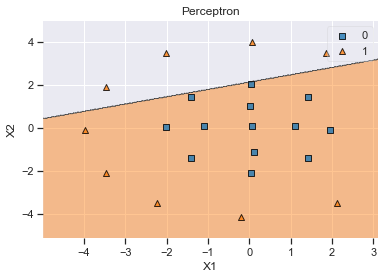

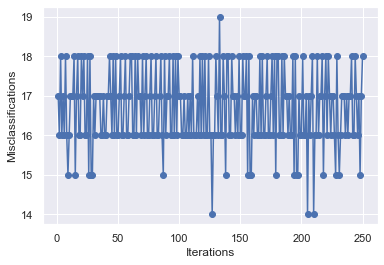

Total number of misclassifications: 17 of 100


In [11]:
ppn = Perceptron(epochs=250, eta=0.01)
ppn.train(X, y)
plot_decision_regions(X, y, clf=ppn)
print('Weights: %s' % ppn.w_)
plt.title('Perceptron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

print('Total number of misclassifications: %d of 100' % (y != ppn.predict(X)).sum())

Weights: [ 0.4     0.2752 -0.597 ]


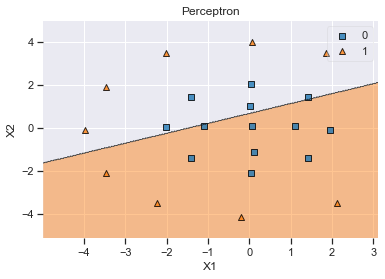

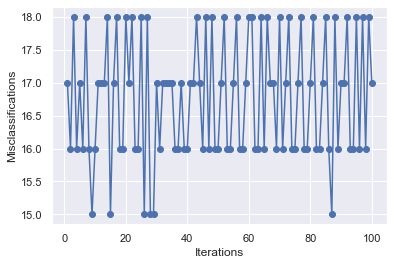

Total number of misclassifications: 18 of 100


In [12]:
ppn = Perceptron(epochs=100, eta=0.1)
ppn.train(X, y)
plot_decision_regions(X, y, clf=ppn)
print('Weights: %s' % ppn.w_)
plt.title('Perceptron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

print('Total number of misclassifications: %d of 100' % (y != ppn.predict(X)).sum())

In [13]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# Defining input features and target variables
X= dataset.iloc[:,0:8]
y= dataset.iloc[:,8]
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (768, 8)
Shape of y: (768,)


In [15]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=1
                                                   )

In [17]:
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras import regularizers

In [18]:
# 7. Build the model.
model = Sequential([
  Dense(12, activation='relu',input_shape=(8,),kernel_initializer='random_normal'),
  Dense(1, activation='sigmoid', kernel_initializer='random_normal'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [19]:
!pip install pydot

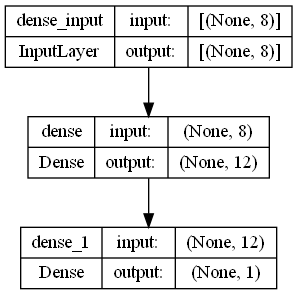

In [20]:
# Visualize Model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
#Compiling the neural network
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, batch_size=10, epochs=150,
                   validation_data=(X_test, y_test))

Epoch 1/150
58/58 [==============================] - 1s 6ms/step - loss: 0.6847 - accuracy: 0.6424 - val_loss: 0.6729 - val_accuracy: 0.6406
Epoch 2/150
58/58 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6545 - val_loss: 0.6260 - val_accuracy: 0.6406
Epoch 3/150
58/58 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.6597 - val_loss: 0.5717 - val_accuracy: 0.7083
Epoch 4/150
58/58 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7326 - val_loss: 0.5316 - val_accuracy: 0.7865
Epoch 5/150
58/58 [==============================] - 0s 3ms/step - loss: 0.5185 - accuracy: 0.7587 - val_loss: 0.5045 - val_accuracy: 0.7812
Epoch 6/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.7691 - val_loss: 0.4906 - val_accuracy: 0.7865
Epoch 7/150
58/58 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7708 - val_loss: 0.4802 - val_accuracy: 0.7917
Epoch 8/150
5

In [22]:
eval_model_for_trainingData=model.evaluate(X_train, y_train)
eval_model_for_trainingData

18/18 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7934


[0.4320826232433319, 0.7934027910232544]

In [23]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)


6/6 [==============================] - 0s 1ms/step


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[109  14]
 [ 22  47]]


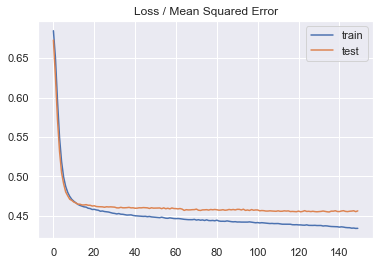

6/6 [==============================] - 0s 2ms/step
[[109  14]
 [ 22  47]]
6/6 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8125


[0.45618104934692383, 0.8125]

In [25]:
import matplotlib.pyplot as pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Your input to confusion_matrix must be an array of int not one hot encodings.
y_pred = model.predict(X_test)
cf_matrix_k = confusion_matrix(y_test, (y_pred>0.5))
print(cf_matrix_k)

model.evaluate(X_test,y_test)

In [26]:
# 7. Build the model.
model = Sequential([
  Dense(8, activation='relu',input_shape=(8,),kernel_initializer='random_normal'),
  Dense(4, activation='relu',kernel_initializer='random_normal'),
  Dense(4, activation='relu',kernel_initializer='random_normal'),
  Dense(1, activation='sigmoid', kernel_initializer='random_normal'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Compiling the neural network
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, batch_size=10, epochs=150,
                   validation_data=(X_test, y_test))

Epoch 1/150
58/58 [==============================] - 2s 9ms/step - loss: 0.6903 - accuracy: 0.6493 - val_loss: 0.6874 - val_accuracy: 0.6406
Epoch 2/150
58/58 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.6545 - val_loss: 0.6785 - val_accuracy: 0.6406
Epoch 3/150
58/58 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.6545 - val_loss: 0.6510 - val_accuracy: 0.6406
Epoch 4/150
58/58 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.6545 - val_loss: 0.5854 - val_accuracy: 0.6406
Epoch 5/150
58/58 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.6545 - val_loss: 0.5283 - val_accuracy: 0.6562
Epoch 6/150
58/58 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7292 - val_loss: 0.5076 - val_accuracy: 0.7760
Epoch 7/150
58/58 [==============================] - 0s 3ms/step - loss: 0.5042 - accuracy: 0.7674 - val_loss: 0.4939 - val_accuracy: 0.7865
Epoch 8/150
5

In [28]:
eval_model_for_trainingData=model.evaluate(X_train, y_train)
eval_model_for_trainingData

18/18 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7865


[0.4312054216861725, 0.7864583134651184]

In [29]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

6/6 [==============================] - 0s 2ms/step


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[108  15]
 [ 23  46]]


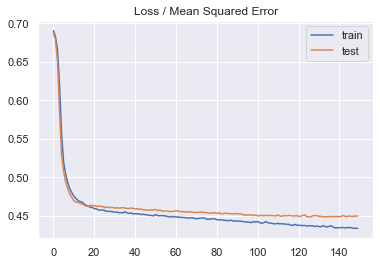

6/6 [==============================] - 0s 2ms/step
[[108  15]
 [ 23  46]]
6/6 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8021


[0.44978460669517517, 0.8020833134651184]

In [31]:
import matplotlib.pyplot as pyplot
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Your input to confusion_matrix must be an array of int not one hot encodings.
y_pred = model.predict(X_test)
cf_matrix_k = confusion_matrix(y_test, (y_pred>0.5))
print(cf_matrix_k)

model.evaluate(X_test,y_test)